# 🌟 Exercise 1 : Open the database
open the database using sqlalchemy module interface. create an engine object in a variable named engine  
call the connect() method to obtain a connection and place in a variable named cur  
now run the code below to to run reflecton on the database, prepare classes that map to the database and create an orm session :  

In [3]:
import sqlalchemy

db_path = 'chinook.db'


engine = sqlalchemy.create_engine(f'sqlite:///{db_path}')


connection = engine.connect()


print("Database connected successfully!")


Database connected successfully!


In [4]:
### useful: extract classes from the chinook database
metadata = sqlalchemy.MetaData()
metadata.reflect(engine)

## we need to do this once
from sqlalchemy.ext.automap import automap_base

# produce a set of mappings from this MetaData.
Base = automap_base(metadata=metadata)

# calling prepare() just sets up mapped classes and relationships.
Base.prepare()

# also prepare an orm session
from sqlalchemy.orm import sessionmaker
Session = sessionmaker(bind=engine)
session = Session()

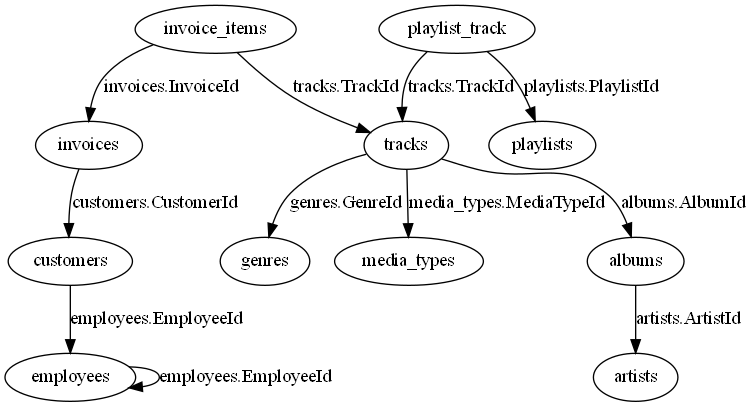

In [12]:
from graphviz import Digraph
from IPython.display import Image, display

# Create a directed graph
dot = Digraph(comment="Database Foreign Key Relationships")

# Add nodes for each table
for table_name in metadata.tables:
    dot.node(table_name, table_name)

# Add edges for foreign key relationships
for table_name, table in metadata.tables.items():
    for fk in table.foreign_keys:
        dot.edge(table_name, fk.column.table.name, label=str(fk.column))

# Render the graph to a PNG image in memory
dot.format = 'svg'

# Save the graph to a file and display it in the Jupyter Notebook
dot.render('db_relationships')  # Saves 'db_relationships.png'

# Display the generated image in the notebook
display(Image('db_relationships.png'))


## 🌟 Exercise 2 : table names
print out all the table names

In [6]:

tables = Base.classes.keys()


print("List of tables:", tables)

List of tables: ['playlists', 'media_types', 'invoices', 'employees', 'invoice_items', 'tracks', 'genres', 'customers', 'artists', 'albums']


## 🌟 Exercise 3 : Tracks
print out the first three tracks in the tracks table

In [7]:
for el in Base.classes:
    print(el)

<class 'sqlalchemy.ext.automap.playlists'>
<class 'sqlalchemy.ext.automap.media_types'>
<class 'sqlalchemy.ext.automap.invoices'>
<class 'sqlalchemy.ext.automap.employees'>
<class 'sqlalchemy.ext.automap.invoice_items'>
<class 'sqlalchemy.ext.automap.tracks'>
<class 'sqlalchemy.ext.automap.genres'>
<class 'sqlalchemy.ext.automap.customers'>
<class 'sqlalchemy.ext.automap.artists'>
<class 'sqlalchemy.ext.automap.albums'>


In [8]:
Tracks = Base.classes.tracks


first_three_tracks = session.query(Tracks).limit(3).all()

# Print the result
for track in first_three_tracks:
    print(f"Track ID: {track.TrackId}, Name: {track.Name}")


Track ID: 1, Name: For Those About To Rock (We Salute You)
Track ID: 2, Name: Balls to the Wall
Track ID: 3, Name: Fast As a Shark


## Exercise 4 : Albums from Tracks
print out the track name and albums title of the first 20 tracks in the tracks table

In [9]:
Tracks = Base.classes.tracks
Albums = Base.classes.albums

# Query to join the tracks and albums tables, fetching the first 20 tracks
result = session.query(Tracks.Name, Albums.Title).join(Albums, Tracks.AlbumId == Albums.AlbumId).limit(20).all()

for track_name, album_title in result:
    print(f"Track Name: {track_name}, Album Title: {album_title}")


Track Name: For Those About To Rock (We Salute You), Album Title: For Those About To Rock We Salute You
Track Name: Put The Finger On You, Album Title: For Those About To Rock We Salute You
Track Name: Let's Get It Up, Album Title: For Those About To Rock We Salute You
Track Name: Inject The Venom, Album Title: For Those About To Rock We Salute You
Track Name: Snowballed, Album Title: For Those About To Rock We Salute You
Track Name: Evil Walks, Album Title: For Those About To Rock We Salute You
Track Name: C.O.D., Album Title: For Those About To Rock We Salute You
Track Name: Breaking The Rules, Album Title: For Those About To Rock We Salute You
Track Name: Night Of The Long Knives, Album Title: For Those About To Rock We Salute You
Track Name: Spellbound, Album Title: For Those About To Rock We Salute You
Track Name: Balls to the Wall, Album Title: Balls to the Wall
Track Name: Fast As a Shark, Album Title: Restless and Wild
Track Name: Restless and Wild, Album Title: Restless and Wi

## 🌟 Exercise : Tracks sold
print out the first 10 track sales from the invoice_items table  
for these first 10 sales, print what are the names of the track sold, and the quantity sold

In [10]:
# Access the mapped classes for 'invoice_items' and 'tracks'
InvoiceItems = Base.classes.invoice_items
Tracks = Base.classes.tracks

# Query to join invoice_items with tracks, fetching the first 10 track sales
result = session.query(Tracks.Name, InvoiceItems.Quantity).join(Tracks, InvoiceItems.TrackId == Tracks.TrackId).limit(10).all()

# Print the track names and quantities sold
for track_name, quantity in result:
    print(f"Track Name: {track_name}, Quantity Sold: {quantity}")


Track Name: Balls to the Wall, Quantity Sold: 1
Track Name: Restless and Wild, Quantity Sold: 1
Track Name: Put The Finger On You, Quantity Sold: 1
Track Name: Inject The Venom, Quantity Sold: 1
Track Name: Evil Walks, Quantity Sold: 1
Track Name: Breaking The Rules, Quantity Sold: 1
Track Name: Dog Eat Dog, Quantity Sold: 1
Track Name: Overdose, Quantity Sold: 1
Track Name: Love In An Elevator, Quantity Sold: 1
Track Name: Janie's Got A Gun, Quantity Sold: 1


# 🌟 Exercise 6 : Top tracks sold
print the names of top 10 tracks sold, and how many they times they were sold

In [13]:
from sqlalchemy import func


InvoiceItems = Base.classes.invoice_items
Tracks = Base.classes.tracks


result = session.query(Tracks.Name, func.count(InvoiceItems.TrackId).label('sales_count')) \
                .join(Tracks, InvoiceItems.TrackId == Tracks.TrackId) \
                .group_by(Tracks.Name) \
                .order_by(func.count(InvoiceItems.TrackId).desc()) \
                .limit(10) \
                .all()


for track_name, sales_count in result:
    print(f"Track Name: {track_name}, Sales Count: {sales_count}")


Track Name: The Trooper, Sales Count: 5
Track Name: Untitled, Sales Count: 4
Track Name: The Number Of The Beast, Sales Count: 4
Track Name: Sure Know Something, Sales Count: 4
Track Name: Hallowed Be Thy Name, Sales Count: 4
Track Name: Eruption, Sales Count: 4
Track Name: Where Eagles Dare, Sales Count: 3
Track Name: Welcome Home (Sanitarium), Sales Count: 3
Track Name: Sweetest Thing, Sales Count: 3
Track Name: Surrender, Sales Count: 3
